## Import dependencies

In [1]:
from splinter import Browser
#from splinter.exceptions import ElementDoesNotExist
from bs4 import BeautifulSoup as bs
import requests

In [2]:
executable_path = {'executable_path': 'chromedriver.exe'}
browser = Browser('chrome', **executable_path, headless=False)

## List of all languages I want to look for
### Since we want to study the programming job market we decided to use different programming lenguages to look for

In [3]:
language=["python", "sql", "mongodb", "javascript"]

## Create empty list for all the information wanted
### The information we wanted to gather was  the job title, the job description, the salary and the lenguage we were looking for

In [4]:
job_title=[]
job_description=[]
salaries=[]
languages=[]

## This is the part where the extraction comes up

### 1. Loop for languages wanted in order to get the proper url and then visit the website 

### 2. Iterate trough all listings in the website and extract the information wanted

### 3. There were some postings which had no salary info. For this cases, we appended a "NaN" to the list

### 4. In order to try to have an even set of numbers for each lenguages, we decided to collect the information for the first ten result pages in the website.

In [5]:
for lan in language:
    language_url='https://www.occ.com.mx/empleos/de-'+ lan + '/en-ciudad-de-mexico/'
    browser.visit(language_url)
    response=requests.get(language_url)
    soup=bs(response.text,'html.parser')
    listings=soup.find('div', class_='c0132 c0177 c01465')

    #Iterate trough all listings in the website and extract the information wanted
    
    for l in listings:
        jt=l.find_all('h2', class_='c01415 c01417 c01533')
        for j in jt:
            j_t=j.text
            job_title.append(j_t)

       
        #Append a "NaN" for all listings that do not mention the salary
        
        pre_salary=l.find_all('div', class_="c01409")
        for p in pre_salary:
            if p.find_all('span', id="salaryInfo")==[]:
                salaries.append("NaN")
            else:
                salary=p.find_all('span', id="salaryInfo")
                for s in salary:
                    sa=s.text.replace('$','').replace(',','')
                    salaries.append(sa)

        jd=l.find_all('p', class_="c01544")
        for i in jd:
            j_d=i.text
            job_description.append(j_d)
            languages.append(lan)
        
    
    #Extract the information for the first 5 pages of each language search

    for x in range(2,11):
        next_url=language_url+'?page='+str(x)
        browser.visit(next_url)
        response=requests.get(next_url)
        soup=bs(response.text,'html.parser')
        listings=soup.find('div', class_='c0132 c0177 c01465')
        
        try:
            
            #In case there were less than 5 pages for each search
            
            for l in listings:
                jt=l.find_all('h2', class_='c01415 c01417 c01533')
                for j in jt:
                    j_t=j.text
                    job_title.append(j_t)

                pre_salary=l.find_all('div', class_="c01409")
                for p in pre_salary:
                    if p.find_all('span', id="salaryInfo")==[]:
                        salaries.append("NaN")
                    else:
                        salary=p.find_all('span', id="salaryInfo")
                        for s in salary:
                            sa=s.text.replace('$','').replace(',','')
                            salaries.append(sa)

                jd=l.find_all('p', class_="c01544")
                for i in jd:
                    j_d=i.text
                    job_description.append(j_d)
                    languages.append(lan)
        except:
            pass

## Create a dataframe with the information gathered and also add three columns with the maximum, minimun and average salary and drop job description column since it does not add value. Check if dataframe looks good.

In [13]:
import pandas as pd
occ_data=list(zip(job_title,job_description,salaries,languages))
occ_df=pd.DataFrame(occ_data,columns=["Job title","Job Description","Salary","Languages"])
occ_df['Min_Salary']=occ_df['Salary'].str.split(' - ')
occ_df['Min_Salary']=occ_df['Min_Salary'].str.get(0).astype(float)

occ_df['Max_Salary']=occ_df['Salary'].str.split(' - ')
occ_df['Max_Salary']=occ_df['Max_Salary'].str.get(1).astype(float)

occ_df['Avg_Salary']=(occ_df['Min_Salary']+occ_df['Max_Salary'])/2

occ_df=occ_df.drop(columns=["Job Description","Salary"])

occ_df

,Job title,Languages,Min_Salary,Max_Salary,Avg_Salary
0,Programador Python,python,12000.0,17000.0,14500.0
1,Desarrollador Python,python,20000.0,25000.0,22500.0
2,- Python -,python,NaN,NaN,NaN
3,Coordinador de medición de indicadores (Python),python,22000.0,30000.0,26000.0
4,Python Tech Lead,python,NaN,NaN,NaN
5,"Desarrollador Java, Python y XML",python,3000.0,5000.0,4000.0
6,***Desarrollador PYTHON SR***,python,45000.0,50000.0,47500.0
7,Python Junior Analyst - Advanced English,python,18000.0,27000.0,22500.0
8,PROGRAMADOR PYTHON,python,NaN,NaN,NaN
9,"BECARIOS ANALISIS DE MERCADO (INGLEs, EXCEL, P...",python,9000.0,NaN,NaN


## Just for fun, let's see which programming lenguage pays better

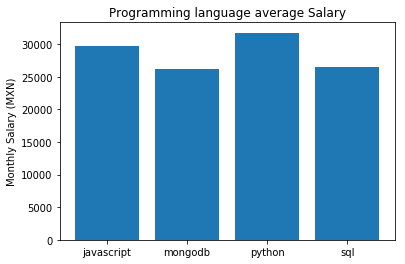

In [14]:
import matplotlib.pyplot as plt
lenguages_df=occ_df.groupby("Languages").mean().reset_index()

plt.bar(lenguages_df["Languages"],lenguages_df["Avg_Salary"])
plt.ylabel('Monthly Salary (MXN)')
plt.title('Programming language average Salary')

plt.show()

## Connect to local database 

In [15]:
from sqlalchemy import create_engine
connection_string = "postgres:postgres@localhost:5432/jobs_scrap_data"
engine = create_engine(f'postgresql://{connection_string}')

## Check for the tables

In [16]:
engine.table_names()

['jobs_data']

## Load DataFrame into database

In [17]:
occ_df.to_sql(name='jobs_data', con=engine, if_exists='append', index=False)

## Check if the dataframe was uploaded successfully

In [18]:
pd.read_sql_query('select * from jobs_data', con=engine).head()

,id,Job title,Languages,Min_Salary,Max_Salary,Avg_Salary
0,1,Programador Python,python,12000.0,17000.0,14500.0
1,2,Desarrollador Python,python,20000.0,25000.0,22500.0
2,3,Coordinador de medición de indicadores (Python),python,22000.0,30000.0,26000.0
3,4,Python Tech Lead,python,NaN,NaN,NaN
4,5,DATA SCIENCE,python,32000.0,35000.0,33500.0
